In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_excel('./fit_parameter20.xlsx')
dfo = pd.read_excel('./EdgeContour2.xls')

In [20]:
print("data shape:", df.shape)


data shape: (75, 16)


In [21]:
df.describe()

,note,a/x1,b/x0,phi/y1,xc/y0,yc/length,Y0_in,long_axis,short_axis,angle,start_seq,end_seq,start_x,start_y,end_x,end_y
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.253333,9.872223,393.241038,-0.078211,625.028639,1291.358563,299.533417,24.380701,16.253311,23.946667,1834.320000,1882.626667,622.994777,476.228451,623.015045,476.217699
std,0.973893,15.749812,803.170433,0.555754,1021.876850,3782.144502,235.572292,35.235274,32.007346,25.143315,1097.713535,1095.705546,357.375811,57.826362,357.347713,57.842113
min,-1.000000,-0.999262,-406.242148,-0.998314,-2693.061316,-177.283540,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,119.290600,385.059300,119.290600,385.089400
25%,-1.000000,0.195208,4.291824,-0.500522,310.538501,207.657589,0.000000,0.000000,0.000000,0.000000,829.500000,903.500000,316.631750,434.528400,316.631750,434.528400
50%,1.000000,4.461877,29.814211,-0.221737,602.478040,482.160724,435.429725,14.931563,5.232058,16.000000,1773.000000,1832.000000,574.905400,447.830900,574.905400,447.830900
75%,1.000000,11.213627,257.754311,0.360480,1030.661232,1024.790857,515.711060,22.760044,9.153931,45.000000,2713.500000,2815.500000,938.928500,516.401200,938.928500,516.401200
max,1.000000,79.141204,3500.770592,0.998295,3951.902337,23672.807284,545.736909,168.810750,158.282408,74.000000,3603.000000,3624.000000,1166.248000,569.196100,1166.248000,569.196100


In [22]:
for i in range(df.shape[0]):
    if(df.iloc[i,0]==1):
        x1=np.array([df.iloc[i,12]-df.iloc[i,4],df.iloc[i,13]-df.iloc[i,5]])
        y1=np.array([df.iloc[i,14]-df.iloc[i,4],df.iloc[i,15]-df.iloc[i,5]])
        
        # 分别计算两个向量的模：
        l_x=np.sqrt(x1.dot(x1))
        l_y=np.sqrt(y1.dot(y1))
        
        # 计算两个向量的点积
        dian=x1.dot(y1)
        
        
        # 计算夹角的cos值：
        cos_=dian/(l_x*l_y)
        # print('向量的模=',l_x,l_y)
        # print("x  y",x1,y1)
        # print('向量的点积=',dian)
        # print('夹角的cos值=',cos_)
        # 求得夹角（弧度制）：
        angle_hu=np.arccos(cos_)
        # 转换为角度值：
        angle_d=angle_hu*180/np.pi
        df.iloc[i,9]=angle_d

In [23]:
# df.head(10)

In [24]:
X=dfo.iloc[:,0]
Y=dfo.iloc[:,1]

<function matplotlib.pyplot.show(close=None, block=None)>

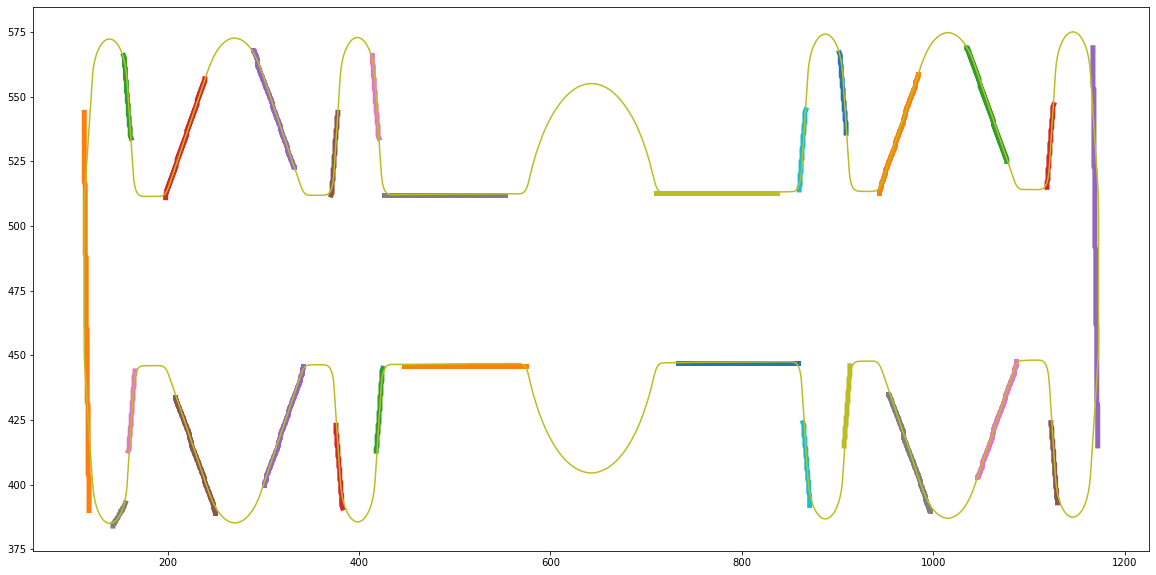

In [25]:
#parameter MAX
MAX = 5500
seq = np.arange(MAX+120)
plt.figure(figsize = (20,10))
# for i in range(MAX+100):
#     seq[i] = i 
for i in range(df.shape[0]):
    # if(df.iloc[i,0]==1):
        
        #draw ellipse
    if(df.iloc[i,0]==-1):
        #draw line
        # print("0")
        s = df.iloc[i,10]
        e = df.iloc[i,11]
        x1 = df.iloc[i,1]
        x0 = df.iloc[i,2]
        y1 = df.iloc[i,3]
        y0 = df.iloc[i,4]
        ax = seq[s:e]
        x_list = np.arange(e-s)
        y_list = np.arange(e-s)
        for j in range(e-s):
            # x_list[j] = x_list[j]+s
            # y_list[j] = y_list[j]+s
            x_list[j] = x1* ax[j]  +x0
            y_list[j] = y1* ax[j]  +y0
        # print(axis.shape[0])
        # for k in range(s,e):
        #plt.scatter(x_list,y_list)
        # plt.subplot(131)
        # plt.plot(ax,x_list)
        # plt.subplot(132)
        # plt.plot(ax,y_list)
        # plt.subplot(133)
        plt.plot(x_list,y_list,linewidth = 5)
plt.plot(X,Y)

plt.show


        
    

In [26]:
result= pd.DataFrame(df)

writer = pd.ExcelWriter('result2.xlsx')		# 写入Excel文件
result.to_excel(writer, float_format='%.5f')		# ‘page_1’是写入excel的sheet名
writer.save()

writer.close()

D:\softwares\lib\site-packages\xlsxwriter\workbook.py:336: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


# show time